# The key features of PyTorch

# Creating a graph in PyTorch

In [1]:
# import torch

# def compute_z(a, b, c):
#     r1 = torch.sub(a, b)
#     r2 = torch.mul(r1, 2)
#     z = torch.add(r2, c)
#     return z

In [2]:
# print('Scalar Inputs:', compute_z(torch.tensor(1), torch.tensor(2), torch.tensor(3)))

In [3]:
# print('Rank 1 Inputs:', compute_z(torch.tensor([1]), torch.tensor([2]), torch.tensor([3])))

In [4]:
# print('Rank 2 Inputs:', compute_z(torch.tensor([[1]]), torch.tensor([[2]]), torch.tensor([[3]])))

# PyTorch tensor objects for storing and updating model parameters

In [5]:
# a = torch.tensor(3.14, requires_grad=True)
# print(a)

In [6]:
# b = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
# print(b)

In [7]:
# w = torch.tensor([1.0, 2.0, 3.0])
# print(w.requires_grad)

In [8]:
# w.requires_grad_()
# print(w.requires_grad)

In [9]:
# import torch.nn as nn

# torch.manual_seed(1)
# w = torch.empty(2, 3)
# nn.init.xavier_normal_(w)
# print(w)

In [10]:
# class MyModule(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.w1 = torch.empty(2, 3, requires_grad=True)
#         nn.init.xavier_normal_(self.w1)
#         self.w2 = torch.empty(1, 2, requires_grad=True)
#         nn.init.xavier_normal_(self.w2)

In [11]:
# w = torch.tensor(1.0, requires_grad=True)
# b = torch.tensor(0.5, requires_grad=True)
# x = torch.tensor([1.4])
# y = torch.tensor([2.1])
# z = torch.add(torch.mul(w, x), b)
# loss = (y-z).pow(2).sum()
# loss.backward()
# print('dL/dw: ', w.grad)
# print('dL/db: ', b.grad)

In [12]:
# # verifying the computed gradient
# print(2 * x * ((w * x + b) - y))

In [13]:
# print(2 * ((w * x + b) - y))

# Implementing models based on nn.Sequential

In [14]:
import torch
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(4, 16),
    nn.ReLU(),
    nn.Linear(16, 32),
    nn.ReLU()
)

model

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
)

In [15]:
import numpy as np

model[0]

Linear(in_features=4, out_features=16, bias=True)

In [16]:
l = nn.init.xavier_uniform_(model[0].weight)
l1_weight = 0.01
l1_penalty = l1_weight * model[2].weight.abs().sum()

In [17]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

[[-0.16595599  0.44064899]
 [-0.99977125 -0.39533485]
 [-0.70648822 -0.81532281]
 [-0.62747958 -0.30887855]
 [-0.20646505  0.07763347]
 [-0.16161097  0.370439  ]
 [-0.5910955   0.75623487]
 [-0.94522481  0.34093502]
 [-0.1653904   0.11737966]
 [-0.71922612 -0.60379702]]
[0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 1.]


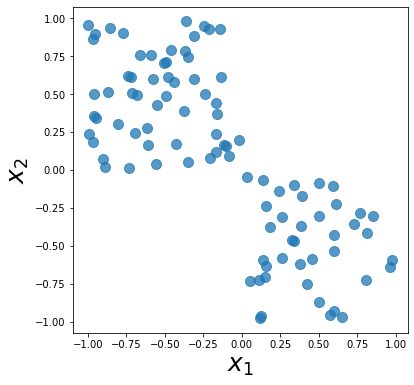

In [18]:
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(1)
np.random.seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1] < 0] = 0
print(x[:10])
print(y)

n_train = 100
fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], x[y==0, 1], 'o', alpha=0.75, markersize=10)
# plt.plot(x[y==1, 0], x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=25)
plt.ylabel(r'$x_2$', size=25)
plt.show()

In [19]:
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)

In [20]:
# model = nn.Sequential(
#     nn.Linear(2, 1),
#     nn.Sigmoid())

# model

# loss_fn = nn.BCELoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [21]:
import torch
import torch.nn as nn


model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)


loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)

model

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)

In [22]:
from torch.utils.data import DataLoader, TensorDataset

train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
print(list(train_dl))

[[tensor([[ 0.0493,  0.8496],
        [ 0.8550, -0.3045]]), tensor([1., 0.])], [tensor([[ 0.8068,  0.1474],
        [-0.7065, -0.8153]]), tensor([1., 1.])], [tensor([[-0.1654,  0.1174],
        [-0.4794,  0.6095]]), tensor([0., 0.])], [tensor([[ 0.4230, -0.7515],
        [-0.1616,  0.3704]]), tensor([0., 0.])], [tensor([[-0.1660,  0.4406],
        [ 0.9158,  0.0663]]), tensor([0., 1.])], [tensor([[0.7666, 0.2473],
        [0.7201, 0.0777]]), tensor([1., 1.])], [tensor([[ 0.7719, -0.2855],
        [ 0.2336,  0.8980]]), tensor([0., 1.])], [tensor([[-0.9452,  0.3409],
        [-0.6553, -0.7257]]), tensor([0., 1.])], [tensor([[-0.3653,  0.9772],
        [ 0.8172, -0.4128]]), tensor([0., 0.])], [tensor([[0.3730, 0.6693],
        [0.9400, 0.6937]]), tensor([1., 1.])], [tensor([[-0.7214,  0.6148],
        [ 0.5019, -0.3022]]), tensor([0., 0.])], [tensor([[-0.9943,  0.2343],
        [ 0.1221, -0.9627]]), tensor([0., 0.])], [tensor([[ 0.1715,  0.9392],
        [-0.1837, -0.5259]]), tensor([1., 

In [23]:
torch.manual_seed(1)
num_epochs = 200

def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item() * 2  # ?
            is_correct = ((pred >= 0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()
        loss_hist_train[epoch] /= n_train
        accuracy_hist_train[epoch] /= n_train/batch_size
        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred >= 0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, \
           accuracy_hist_train, accuracy_hist_valid


history = train(model, num_epochs, train_dl, x_valid, y_valid)

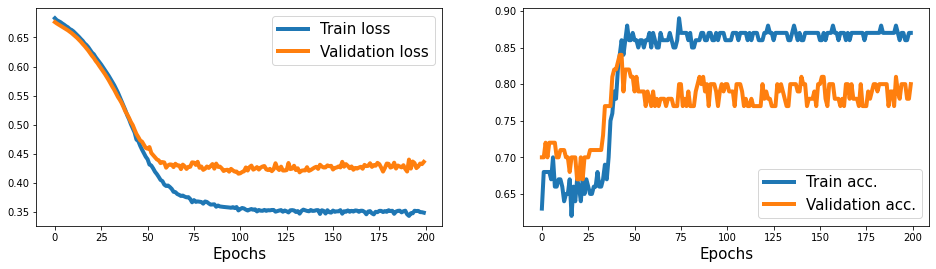

In [24]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
# print(history[0])
plt.plot(history[0], lw=4)
# print(history[1])
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
plt.show()

In [25]:
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)

model

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)

In [26]:
history = train(model, num_epochs, train_dl, x_valid, y_valid)

# Making model building more flexible with nn.Module

In [27]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2, 4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4, 4)
        a2 = nn.ReLU()
        l3 = nn.Linear(4, 1)
        a3 = nn.Sigmoid()
        l = [l1, a1, l2, a2, l3, a3]
        self.module_list = nn.ModuleList(l)
        
    def forward(self, x):
        for f in self.module_list:
            x = f(x)
        return x
    
    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred >= 0.5).float()
    
    
model = MyModule()

model

MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [28]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)
history = train(model, num_epochs, train_dl, x_valid, y_valid)

<ipython-input-29-3035e9b974e2>:16: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  y=y_valid.numpy().astype(np.integer),


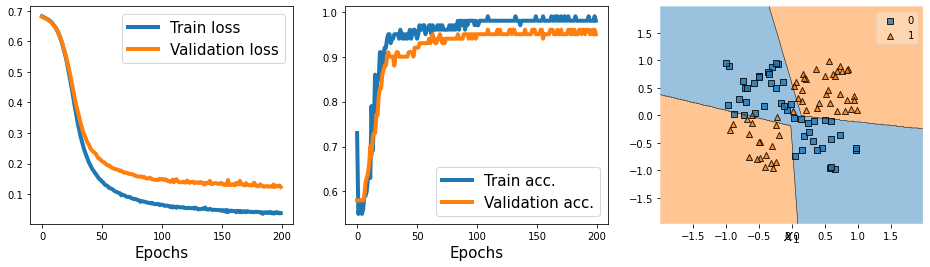

In [29]:
from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid.numpy(),
                      y=y_valid.numpy().astype(np.integer),
                      clf=model)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_xlabel(r'$x_1$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

# Writing custom layers in PyTorch

In [30]:
class NoisyLinear(nn.Module):
    def __init__(self, input_size, output_size,
                 noise_stddev=0.1):
        super().__init__()
        w = torch.Tensor(input_size, output_size)
        self.w = nn.Parameter(w)  # nn.Parameter is a Tensor
                                  # that's a module parameter
        nn.init.xavier_uniform_(self.w)
        b = torch.Tensor(output_size).fill_(0)
        self.b = nn.Parameter(b)
        self.noise_stddev = noise_stddev
        
    def forward(self, x, training=False):
        if training:
            noise = torch.normal(0.0, self.noise_stddev, x.shape)
            x_new = torch.add(x, noise)
        else:
            x_new = x
        return torch.add(torch.mm(x_new, self.w), self.b)
    
    
torch.manual_seed(1)
noisy_layer = NoisyLinear(4, 2)
x = torch.zeros((1, 4))
     

In [31]:
print(noisy_layer(x, training=True))

tensor([[ 0.1154, -0.0598]], grad_fn=<AddBackward0>)


In [32]:
print(noisy_layer(x, training=True))

tensor([[ 0.0432, -0.0375]], grad_fn=<AddBackward0>)


In [33]:
print(noisy_layer(x, training=False))

tensor([[0., 0.]], grad_fn=<AddBackward0>)


In [34]:
class MyNoisyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = NoisyLinear(2, 4, 0.07)
        self.a1 = nn.ReLU()
        self.l2 = nn.Linear(4, 4)
        self.a2 = nn.ReLU()
        self.l3 = nn.Linear(4, 1)
        self.a3 = nn.Sigmoid()
        
    def forward(self, x, training=False):
        x = self.l1(x, training)
        x = self.a1(x)
        x = self.l2(x)
        x = self.a2(x)
        x = self.l3(x)
        x = self.a3(x)
        return x
    
    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred >= 0.5).float()
    

torch.manual_seed(1)
model = MyNoisyModule()

model

MyNoisyModule(
  (l1): NoisyLinear()
  (a1): ReLU()
  (l2): Linear(in_features=4, out_features=4, bias=True)
  (a2): ReLU()
  (l3): Linear(in_features=4, out_features=1, bias=True)
  (a3): Sigmoid()
)

<ipython-input-35-4831c4bf1158>:44: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  y=y_valid.numpy().astype(np.integer),


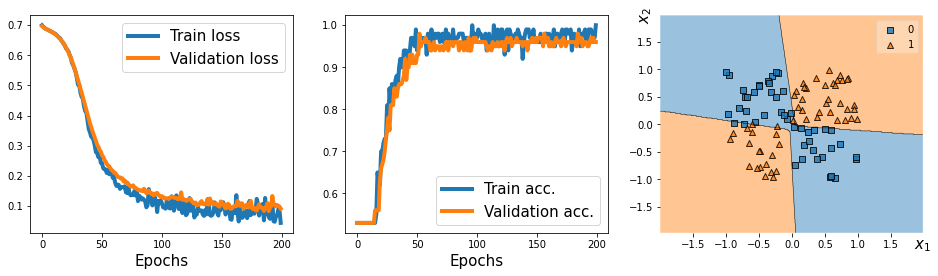

In [35]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)
torch.manual_seed(1)
loss_hist_train = [0] * num_epochs
accuracy_hist_train = [0] * num_epochs
loss_hist_valid = [0] * num_epochs
accuracy_hist_valid = [0] * num_epochs

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch, True)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train[epoch] += loss.item()
        is_correct = (
            (pred >= 0.5).float() == y_batch
        ).float()
        accuracy_hist_train[epoch] += is_correct.mean()
    loss_hist_train[epoch] /= 100/batch_size
    accuracy_hist_train[epoch] /= 100/batch_size
    pred = model(x_valid)[:, 0]
    loss = loss_fn(pred, y_valid)
    loss_hist_valid[epoch] = loss.item()
    is_correct = ((pred >= 0.5).float() == y_valid).float()
    accuracy_hist_valid[epoch] += is_correct.mean()
    
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(loss_hist_train, lw=4)
plt.plot(loss_hist_valid, lw=4)

plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 2)
plt.plot(accuracy_hist_train, lw=4)
plt.plot(accuracy_hist_valid, lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(
    X=x_valid.numpy(),
    y=y_valid.numpy().astype(np.integer),
    clf=model
)

ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

# Project one – predicting the fuel efficiency of a car

In [36]:
import pandas as pd

pd.options.display.max_rows = 999
pd.set_option('display.max_columns', 50)
pd.set_option('max_colwidth', 1000)
pd.set_option('display.width', 1000)


url = 'http://archive.ics.uci.edu/ml/' \
      'machine-learning-databases/auto-mpg/auto-mpg.data'

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
                'Weight', 'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(url, names=column_names,
                 na_values='?', comment='\t',
                 sep=' ', skipinitialspace=True)

## drop the NA rows
df = df.dropna()
df = df.reset_index(drop=True)

## train/test splits:
import sklearn
import sklearn.model_selection

df_train, df_test = sklearn.model_selection.train_test_split(
    df, train_size=0.8, random_state=1
)

train_stats = df_train.describe().transpose()

numeric_column_names = [
    'Cylinders', 'Displacement',
    'Horsepower', 'Weight',
    'Acceleration'
]

df_train.head(21)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
334,27.2,4,135.0,84.0,2490.0,15.7,81,1
258,18.6,6,225.0,110.0,3620.0,18.7,78,1
139,29.0,4,98.0,83.0,2219.0,16.5,74,2
310,37.2,4,86.0,65.0,2019.0,16.4,80,3
349,33.0,4,105.0,74.0,2190.0,14.2,81,2
95,13.0,8,360.0,175.0,3821.0,11.0,73,1
358,22.4,6,231.0,110.0,3415.0,15.8,81,1
327,44.6,4,91.0,67.0,1850.0,13.8,80,3
294,27.4,4,121.0,80.0,2670.0,15.0,79,1
127,31.0,4,79.0,67.0,1950.0,19.0,74,3


In [37]:
train_stats

,count,mean,std,min,25%,50%,75%,max
MPG,313.0,23.404153,7.666909,9.0,17.5,23.0,29.0,46.6
Cylinders,313.0,5.402556,1.701506,3.0,4.0,4.0,8.0,8.0
Displacement,313.0,189.512780,102.675646,68.0,104.0,140.0,260.0,455.0
Horsepower,313.0,102.929712,37.919046,46.0,75.0,92.0,120.0,230.0
Weight,313.0,2961.198083,848.602146,1613.0,2219.0,2755.0,3574.0,5140.0
Acceleration,313.0,15.704473,2.725399,8.5,14.0,15.5,17.3,24.8
Model Year,313.0,75.929712,3.675305,70.0,73.0,76.0,79.0,82.0
Origin,313.0,1.591054,0.807923,1.0,1.0,1.0,2.0,3.0


In [38]:
## my_test = pd.Series([1.800e+01, 8.000e+00, 3.070e+02, 1.300e+02, 3.504e+03, 1.200e+01,
#         7.000e+01, 1.000e+00])
my_test = df_train.iloc[19, :]
my_test

MPG               20.8
Cylinders          6.0
Displacement     200.0
Horsepower        85.0
Weight          3070.0
Acceleration      16.7
Model Year        78.0
Origin             1.0
Name: 257, dtype: float64

In [39]:
df_train_norm, df_test_norm = df_train.copy(), df_test.copy()
my_test_norm = my_test.copy()

for col_name in numeric_column_names:
#     print(col_name)
    mean = train_stats.loc[col_name, 'mean']
#     print(mean)
    std = train_stats.loc[col_name, 'std']
    df_train_norm.loc[:, col_name] = (df_train_norm.loc[:, col_name] - mean) / std
    df_test_norm.loc[:, col_name] = (df_test_norm.loc[:, col_name] - mean) / std
    my_test_norm.loc[col_name] = (my_test_norm.loc[col_name] - mean) / std
    
my_test_norm

MPG             20.800000
Cylinders        0.351127
Displacement     0.102139
Horsepower      -0.472842
Weight           0.128213
Acceleration     0.365278
Model Year      78.000000
Origin           1.000000
Name: 257, dtype: float64

In [40]:
boundaries = torch.tensor([73, 76, 79])
v = torch.tensor(df_train_norm['Model Year'].values)
df_train_norm['Model Year Bucketed'] = torch.bucketize(v, boundaries, right=True)

v = torch.tensor(df_test_norm['Model Year'].values)
df_test_norm['Model Year Bucketed'] = torch.bucketize(v, boundaries, right=True)

# numeric_column_names.append('Model Year Bucketed')
# df_train_norm

In [41]:
df_train_norm.head(21)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Model Year Bucketed
334,27.2,-0.824303,-0.530922,-0.499214,-0.555264,-0.001641,81,1,3
258,18.6,0.351127,0.345625,0.186457,0.776338,1.099115,78,1,2
139,29.0,-0.824303,-0.891280,-0.525586,-0.874613,0.291894,74,2,1
310,37.2,-0.824303,-1.008153,-1.000281,-1.110294,0.255202,80,3,3
349,33.0,-0.824303,-0.823104,-0.762934,-0.908786,-0.552019,81,2,3
95,13.0,1.526556,1.660445,1.900636,1.013198,-1.726159,73,1,1
358,22.4,0.351127,0.404061,0.186457,0.534764,0.035051,81,1,3
327,44.6,-0.824303,-0.959456,-0.947537,-1.309445,-0.698787,80,3,3
294,27.4,-0.824303,-0.667274,-0.604702,-0.343150,-0.258484,79,1,3
127,31.0,-0.824303,-1.076329,-0.947537,-1.191604,1.209191,74,3,1


In [42]:
from torch.nn.functional import one_hot

torch.set_printoptions(threshold=10_000)
torch.set_printoptions(threshold=10_000)

total_origin = len(set(df_train_norm['Origin']))
origin_encoded = one_hot(torch.from_numpy(df_train_norm['Origin'].values) % total_origin)

x_train_numeric = torch.tensor(df_train_norm[numeric_column_names].values)

x_train = torch.cat([x_train_numeric, origin_encoded], 1).float()

origin_encoded = one_hot(torch.from_numpy(df_test_norm['Origin'].values) % total_origin)
x_test_numeric = torch.tensor(df_test_norm[numeric_column_names].values)

x_test = torch.cat([x_test_numeric, origin_encoded], 1).float()

print(x_train[:21])

tensor([[-8.2430e-01, -5.3092e-01, -4.9921e-01, -5.5526e-01, -1.6412e-03,
          0.0000e+00,  1.0000e+00,  0.0000e+00],
        [ 3.5113e-01,  3.4562e-01,  1.8646e-01,  7.7634e-01,  1.0991e+00,
          0.0000e+00,  1.0000e+00,  0.0000e+00],
        [-8.2430e-01, -8.9128e-01, -5.2559e-01, -8.7461e-01,  2.9189e-01,
          0.0000e+00,  0.0000e+00,  1.0000e+00],
        [-8.2430e-01, -1.0082e+00, -1.0003e+00, -1.1103e+00,  2.5520e-01,
          1.0000e+00,  0.0000e+00,  0.0000e+00],
        [-8.2430e-01, -8.2310e-01, -7.6293e-01, -9.0879e-01, -5.5202e-01,
          0.0000e+00,  0.0000e+00,  1.0000e+00],
        [ 1.5266e+00,  1.6604e+00,  1.9006e+00,  1.0132e+00, -1.7262e+00,
          0.0000e+00,  1.0000e+00,  0.0000e+00],
        [ 3.5113e-01,  4.0406e-01,  1.8646e-01,  5.3476e-01,  3.5051e-02,
          0.0000e+00,  1.0000e+00,  0.0000e+00],
        [-8.2430e-01, -9.5946e-01, -9.4754e-01, -1.3094e+00, -6.9879e-01,
          1.0000e+00,  0.0000e+00,  0.0000e+00],
        [-8.2430

In [43]:
y_train = torch.tensor(df_train_norm['MPG'].values).float()
y_test = torch.tensor(df_test_norm['MPG'].values).float()
y_test

tensor([23.0000, 29.0000, 32.4000, 19.0000, 38.0000, 33.5000, 26.0000, 14.0000,
        28.0000, 32.4000, 21.5000, 41.5000, 17.0000, 33.5000, 29.0000, 17.0000,
        36.0000, 43.4000, 14.0000, 20.0000, 26.0000, 16.0000, 15.0000, 15.5000,
        15.0000, 18.5000, 31.5000, 20.0000, 21.0000, 30.0000, 19.2000, 24.5000,
        13.0000, 22.0000, 20.5000, 17.5000, 18.0000, 19.2000, 38.0000, 27.0000,
        15.5000, 14.0000, 20.0000, 19.0000, 18.0000, 15.0000, 11.0000, 31.0000,
        22.0000, 13.0000, 17.0000, 20.5000, 28.0000, 32.0000, 29.8000, 18.0000,
        28.8000, 21.0000, 33.5000, 36.1000, 38.0000, 28.0000, 37.0000, 19.9000,
        22.5000, 19.0000, 19.0000, 14.0000, 31.9000, 12.0000, 37.0000, 19.2000,
        13.0000, 34.3000, 26.0000, 35.7000, 14.0000, 13.0000, 13.0000])

 Training a DNN regression model 

In [44]:
train_ds = TensorDataset(x_train, y_train)
batch_size = 8
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
# x_train

In [45]:
hidden_units = [8, 4]
input_size = x_train.shape[1]
all_layers = []

for hidden_unit in hidden_units:
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    all_layers.append(nn.ReLU())
    input_size = hidden_unit
all_layers.append(nn.Linear(hidden_units[-1], 1))
model = nn.Sequential(*all_layers)
model

Sequential(
  (0): Linear(in_features=8, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

In [46]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

torch.manual_seed(1)
num_epochs = 200
log_epochs = 20

In [47]:
y_batch = None
for epoch in range(num_epochs):
    loss_hist_train = 0
    for x_batch, y_batch in train_dl:
#         print(x_batch, y_batch)
        pred = model(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train += loss.item()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch}  Loss '
              f'{loss_hist_train/len(train_dl):.4f}')
        

Epoch 0  Loss 393.8847
Epoch 20  Loss 13.9156
Epoch 40  Loss 13.6292
Epoch 60  Loss 13.5050
Epoch 80  Loss 13.3355
Epoch 100  Loss 13.3180
Epoch 120  Loss 12.9376
Epoch 140  Loss 12.7167
Epoch 160  Loss 13.0064
Epoch 180  Loss 13.2371


In [48]:
print(pred)

tensor([25.6820], grad_fn=<SelectBackward>)


In [49]:
with torch.no_grad():
    pred = model(x_test.float())[:, 0]
    loss = loss_fn(pred, y_test)
    print(f'Test MSE: {loss.item():.4f}')
    print(f'Test MAE: {nn.L1Loss()(pred, y_test).item():.4f}')

Test MSE: 17.9080
Test MAE: 2.8940


In [50]:
with torch.no_grad():
#     pred = model(torch.tensor([8., 307., 130., 3504., 12., 70., 1., 0., 0.]))
#     pred = model(torch.tensor([12.5, -0.824303, -0.667274, 0.265573, 2234.0, 70., 1., 0., 0.]))

#     pred = model(torch.tensor([1.526556, 1.563051, 1.373196, 1.648360, -0.295176, 3.000000, 0., 1., 0.]))
    pred = model(torch.tensor([0.351127, 0.102139, -0.472842, 0.128213, 0.365278, 2.000000, 0., 1., 0.]))
    print(pred)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x9 and 8x8)

# Project two – classifying MNIST handwritten digits

In [ ]:
# import torchvision
# from torchvision import transforms

# image_path ='./'
# transform = transforms.Compose([transforms.ToTensor()])

# mnist_train_dataset = torchvision.datasets.MNIST(
#     root=image_path, train=True,                              
#     transform=transform, download=False)

# mnist_test_dataset = torchvision.datasets.MNIST(
#     root=image_path, train=False,
#     transform=transform, download=False)

# batch_size = 64
# torch.manual_seed(1)
# train_dl = DataLoader(mnist_train_dataset,
#                       batch_size, shuffle=True)


# Construct the NN model:

In [ ]:
# hidden_units = [32, 16]
# image_size = mnist_train_dataset[0][0].shape
# input_size = image_size[0] * image_size[1] * image_size[2]
# all_layers = [nn.Flatten()]

# for hidden_unit in hidden_units:
#     layer = nn.Linear(input_size, hidden_unit)
#     all_layers.append(layer)
#     all_layers.append(nn.ReLU())
#     input_size = hidden_unit
# all_layers.append(nn.Linear(hidden_units[-1], 10))
# model = nn.Sequential(*all_layers)

# model

In [ ]:
# print(nn.Linear(hidden_units[-1], 10))

In [ ]:
# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# torch.manual_seed(1)
# num_epochs = 20

# for epoch in range(num_epochs):
#     accuracy_hist_train = 0
#     for x_batch, y_batch in train_dl:
#         pred = model(x_batch)
#         loss = loss_fn(pred, y_batch)
#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()
#         is_correct = (
#             torch.argmax(pred, dim=1) == y_batch).float()
#         accuracy_hist_train += is_correct.sum()
#     accuracy_hist_train /= len(train_dl.dataset)
#     print(f'Epoch {epoch}  Accuracy '
#           f'{accuracy_hist_train:.4f}')

In [ ]:
# pred = model(mnist_test_dataset.data / 255.)
# is_correct = (
#     torch.argmax(pred, dim=1) == mnist_test_dataset.targets
# ).float()

# print(f'Test accuracy: {is_correct.mean():.4f}')

# PyTorch-Lightning

In [ ]:
# import pytorch_lightning as pl
# import torch
# import torch.nn as nn

# from torchmetrics import Accuracy


# class MultiLayerPerceptron(pl.LightningModule):
#     def __init__(self, image_shape=(1, 28, 28), hidden_units=(32, 16)):
#         super().__init__()
        
#         # new PL attributes:
#         self.train_acc = Accuracy()
#         self.valid_acc = Accuracy()
#         self.test_acc = Accuracy()
        
#         #Model similar to previous ssection:
#         input_size = image_shape[0] * image_shape[1] * image_shape[2]
#         all_layers = [nn.Flatten()]
#         for hidden_unit in hidden_units:
#             layer = nn.Linear(input_size, hidden_unit)
#             all_layers.append(layer)
#             all_layers.append(nn.ReLU())
#             input_size = hidden_unit
            
#         all_layers.append(nn.Linear(hidden_units[-1], 10))
#         self.model = nn.Sequential(*all_layers)
        
#     def forward(self, x):
#         x = self.model(x)
#         return x
    
#     def training_step(self, batch, batch_idx):
#         x, y = batch
#         logits = self(x)
#         loss = nn. functional.cross_entropy(self(x), y)
#         preds = torch.argmax(logits, dim=1)
#         self.train_acc.update(preds, y)
#         self.log('train_loss', loss, prog_bar=True)
#         return loss
    
#     def training_epoch_end(self, outs):
#         self.log('train_acc', self.train_acc.compute())
        
#     def validation_step(self, batch, batch_idx):
#         x, y = batch
#         logits = self(x)
#         loss = nn.functional.cross_entropy(self(x), y)
#         preds = torch.argmax(logits, dim=1)
#         self.valid_acc.update(preds, y)
#         self.log('valid_loss', loss, prog_bar=True)
#         self.log('valid_acc', self.valid_acc.compute(), prog_bar=True)
        
#         return loss
    
#     def test_step(self, batch, batch_idx):
#         x, y = batch
#         logits = self(x)
#         loss = nn.functional.cross_entropy(self(x), y)
#         preds = torch.argmax(logits, dim=1)
#         self.test_acc.update(preds, y)
#         self.log('test_loss', loss, prog_bar=True)
#         self.log('test_acc', self.test_acc.compute(), prog_bar=True)
        
#         return loss
    
#     def configure_optimizers(self):
#         optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        
#         return optimizer
    
    

# Setting up the data loaders for Lightning

In [ ]:
# from torch.utils.data import DataLoader
# from torch.utils.data import random_split
# from torchvision.datasets import MNIST
# from torchvision import transforms


# class MnistDataModule(pl.LightningDataModule):
#     def __init__(self, data_path='./'):
#         super().__init__()
#         self.data_path = data_path
#         self.transform = transforms.Compose([transforms.ToTensor()])
        
#     def prepare_data(self):
#         MNIST(root=self.data_path, download=True)
        
#     def setup(self, stage=None):
#         # stage is eighter 'fit', 'validate', 'test', or 'predict'
#         # here note relevant
#         mnist_all = MNIST(
#             root=self.data_path, 
#             train=True,
#             transform=self.transform,
#             download=False
#         )
        
#         self.train, self.val = random_split(
#             mnist_all, [55000, 5000], generator=torch.Generator().manual_seed(1))
#         self.test = MNIST(root=self.data_path,
#                           train=False,
#                           transform=self.transform,
#                           download=False
#                          )
        
#     def train_dataloader(self):
#         return DataLoader(self.train, batch_size=64, num_workers=4)

#     def val_dataloader(self):
#         return DataLoader(self.val, batch_size=64, num_workers=4)

#     def test_dataloader(self):
#         return DataLoader(self.test, batch_size=64, num_workers=4)
        
        
# torch.manual_seed(1)
# mnist_dm = MnistDataModule()

In [ ]:
# mnistclassifier = MultiLayerPerceptron()

# if torch.cuda.is_available(): # if you have GPUs
#     trainer = pl.Trainer(max_epochs=10, gpus=1)
# else:
#     trainer = pl.Trainer(max_epochs=10)
    
# trainer.fit(model=mnistclassifier, datamodule=mnist_dm)


In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir lightning_logs/

In [ ]:
# if torch.cuda.is_available():
#     trainer = pl.Trainer(max_epochs=15, resume_from_checkpoint='./lightning_logs/version_0/checkpoints/epoch=9-step=8600.ckpt', gpus=1)
# else:
#     trainer = pl.Trainer(max_epochs=15, resume_from_checkpoint='./lightning_logs/version_0/checkpoints/epoch=9-step=8600.ckpt')
    
# trainer.fit(model=mnistclassifier, datamodule=mnist_dm)